In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
def remove_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df_final

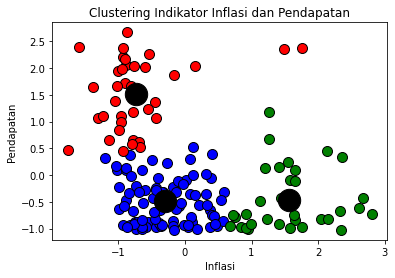

In [3]:
# Clustering Pertama

df_outlier_removed = remove_outlier_IQR(df[["Inflasi", "Pendapatan"]])
df_outlier_removed.dropna(axis=0, inplace=True)
df_outlier_removed.isnull().sum()

sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data=dfoutlier_std, columns=["Inflasi", "Pendapatan"])
new_dfoutlier_std["label_kmeans1"] = labels1

plt.figure()

plt.scatter(new_dfoutlier_std.Inflasi[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std["Pendapatan"][new_dfoutlier_std.label_kmeans1 == 0], c="blue", s=100, edgecolor="black", linestyle='-')
plt.scatter(new_dfoutlier_std.Inflasi[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std["Pendapatan"][new_dfoutlier_std.label_kmeans1 == 1], c="red", s=100, edgecolor="black", linestyle='-')
plt.scatter(new_dfoutlier_std.Inflasi[new_dfoutlier_std.label_kmeans1 == 2], new_dfoutlier_std["Pendapatan"][new_dfoutlier_std.label_kmeans1 == 2], c="green", s=100, edgecolor="black", linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel("Inflasi")
plt.ylabel("Pendapatan")
plt.title("Clustering Indikator Inflasi dan Pendapatan")

plt.show()

In [4]:
# Negara-Negara yang Berada pada Cluster Hijau

index_cluster_2 = np.where(labels1==2)[0]
df = df.iloc[index_cluster_2]
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
2,Algeria,27.3,38.4,4.17,31.4,12900,16.1,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.9,75.8,2.37,10300
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.8,69.1,1.92,5840
14,Belarus,5.5,51.4,5.61,64.5,16200,15.1,70.4,1.49,6030


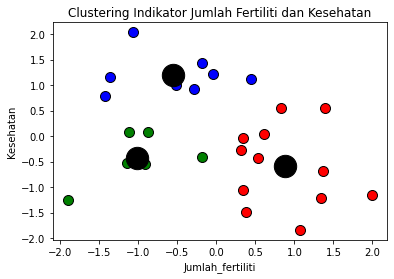

In [5]:
# Clustering Negara-Negara Sebelumnya

df_outlier_removed = remove_outlier_IQR(df[["Jumlah_fertiliti", "Kesehatan"]])
df_outlier_removed.dropna(axis=0, inplace=True)
df_outlier_removed.isnull().sum()

sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df_outlier_removed.astype(float))

kmeans1 = KMeans(n_clusters=3, random_state=42).fit(dfoutlier_std)
labels1 = kmeans1.labels_

new_dfoutlier_std = pd.DataFrame(data=dfoutlier_std, columns=["Jumlah_fertiliti", "Kesehatan"])
new_dfoutlier_std["label_kmeans1"] = labels1

plt.figure()

plt.scatter(new_dfoutlier_std.Jumlah_fertiliti[new_dfoutlier_std.label_kmeans1 == 0], new_dfoutlier_std["Kesehatan"][new_dfoutlier_std.label_kmeans1 == 0], c="blue", s=100, edgecolor="black", linestyle='-')
plt.scatter(new_dfoutlier_std.Jumlah_fertiliti[new_dfoutlier_std.label_kmeans1 == 1], new_dfoutlier_std["Kesehatan"][new_dfoutlier_std.label_kmeans1 == 1], c="red", s=100, edgecolor="black", linestyle='-')
plt.scatter(new_dfoutlier_std.Jumlah_fertiliti[new_dfoutlier_std.label_kmeans1 == 2], new_dfoutlier_std["Kesehatan"][new_dfoutlier_std.label_kmeans1 == 2], c="green", s=100, edgecolor="black", linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel("Jumlah_fertiliti")
plt.ylabel("Kesehatan")
plt.title("Clustering Indikator Jumlah Fertiliti dan Kesehatan")

plt.show()

In [6]:
# Negara-Negara yang Berada pada Cluster Merah

index_cluster_1 = np.where(labels1==1)[0]
df = df.iloc[index_cluster_1]
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200


In [7]:
# Pengelompokkan Negara-Negara

df = df.drop(columns=['Kematian_anak', 'Ekspor', 'Impor', 'Harapan_hidup', 'GDPperkapita'])
df = pd.pivot_table(df, index=['Negara'])

In [8]:
df

,Inflasi,Jumlah_fertiliti,Kesehatan,Pendapatan
Negara,,,,
Algeria,16.100,2.89,4.17,12900
Angola,22.400,6.16,2.85,5900
Belarus,15.100,1.49,5.61,16200
"Congo, Dem. Rep.",20.800,6.54,7.91,609
Finland,0.351,1.87,8.95,39800
Georgia,8.550,1.92,10.10,6730
Indonesia,15.300,2.48,2.61,8430
Lithuania,2.380,1.50,7.04,21100
Malaysia,7.270,2.15,4.39,21100


In [10]:
# Memfilter Data

df = df.sort_values(by=['Inflasi'], ascending=False)
df.head(5)

,Inflasi,Jumlah_fertiliti,Kesehatan,Pendapatan
Negara,,,,
Angola,22.4,6.16,2.85,5900
"Congo, Dem. Rep.",20.8,6.54,7.91,609
Algeria,16.1,2.89,4.17,12900
Indonesia,15.3,2.48,2.61,8430
Belarus,15.1,1.49,5.61,16200
